In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
files.upload()


Saving spam.csv to spam.csv


{'spam.csv': b'v1,v2,,,\r\nham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,\r\nham,Ok lar... Joking wif u oni...,,,\r\nspam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s,,,\r\nham,U dun say so early hor... U c already then say...,,,\r\nham,"Nah I don\'t think he goes to usf, he lives around here though",,,\r\nspam,"FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, \xe5\xa31.50 to rcv",,,\r\nham,Even my brother is not like to speak with me. They treat me like aids patent.,,,\r\nham,As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,\r\nspam,WINNER!! As a valued network customer you have been selected to rece

In [67]:
df = pd.read_csv("spam.csv", encoding="latin1")


In [68]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [69]:
df.shape

(5572, 5)

**Step**

In [70]:
#Data cleaning
#Eda
#Text Preprocessing
#Model Building
#Evaluation
#Improvement
#Website
#Deploy

#1.Data cleaning

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [72]:
#Drop Last 3 columns
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [73]:
#Rename the colns
df.rename(columns={"v1":'Target','v2':'Text'},inplace=True)

In [74]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [75]:
#Apply Label Encoder on output column
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Target"]=encoder.fit_transform(df["Target"])

In [76]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [77]:
#Missing Value
df.isnull().sum()

,0
Target,0
Text,0


In [78]:
#Check Duplicate Value
df.duplicated().sum()

np.int64(403)

In [79]:
#Remove it
df=df.drop_duplicates(keep='first')

In [80]:
df.duplicated().sum()

np.int64(0)

In [81]:
df.shape

(5169, 2)

**2.EDA**

In [82]:
df["Target"].value_counts()

,count
Target,
0,4516
1,653


([<matplotlib.patches.Wedge at 0x7db9b14de990>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'Spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

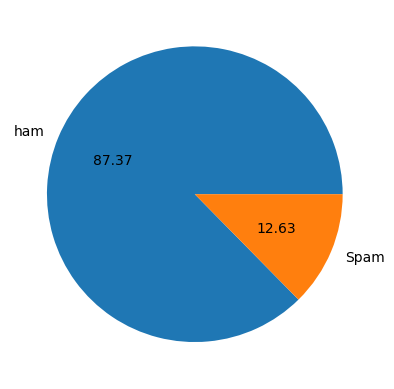

In [83]:
import matplotlib.pyplot as plt
plt.pie(df["Target"].value_counts(),labels=["ham","Spam"],autopct="%0.2f")

In [84]:
#So, We can say that data is imbalaced

In [85]:
#Now we Formed 3 Column-
# 1)No of character in the sms
# 2)No of word in the SMS
# 3)No of sentence in the SMS

In [86]:
!pip install nltk

In [87]:
# For It we will use
import nltk
nltk.download("punkt")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [88]:
# 1)No of character in the sms
df["num_characters"]=df["Text"].apply(len)

In [89]:
# 2)No of word in the SMS

In [90]:
import nltk
nltk.download('punkt', force=True)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [91]:
import shutil
import nltk

# Delete existing punkt
shutil.rmtree('/root/nltk_data/tokenizers/punkt', ignore_errors=True)

# Download it again
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [92]:
import os
print(os.listdir("/root/nltk_data/tokenizers"))


['punkt.zip']


In [93]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [94]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()

df["num_word"] = df["Text"].apply(lambda x: len(tokenizer.tokenize(str(x))))


In [95]:
df.head()

,Target,Text,num_characters,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [96]:
# 3)No of sentence in the SMS

In [97]:
!pip install spacy
import spacy

nlp = spacy.load("en_core_web_sm")

def count_sentences(text):
    doc = nlp(text)
    return len(list(doc.sents))

df["num_Sentences"] = df["Text"].dropna().apply(lambda x: count_sentences(str(x)))



In [98]:
df.head()

,Target,Text,num_characters,num_word,num_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,3
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36,2
3,0,U dun say so early hor... U c already then say...,49,13,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [99]:
#For Ham
df[df["Target"]==0][["num_characters","num_word","num_Sentences"]].describe()

,num_characters,num_word,num_Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.452613,1.961913
std,56.358207,12.858450,1.400953
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,2.000000
75%,90.000000,21.000000,2.000000
max,910.000000,214.000000,27.000000


In [100]:
#For Spam
df[df["Target"]==1][["num_characters","num_word","num_Sentences"]].describe()

,num_characters,num_word,num_Sentences
count,653.000000,653.000000,653.000000
mean,137.891271,26.289433,3.062787
std,30.137753,6.579189,1.471835
min,13.000000,2.000000,1.000000
25%,132.000000,24.000000,2.000000
50%,149.000000,28.000000,3.000000
75%,157.000000,30.000000,4.000000
max,224.000000,41.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

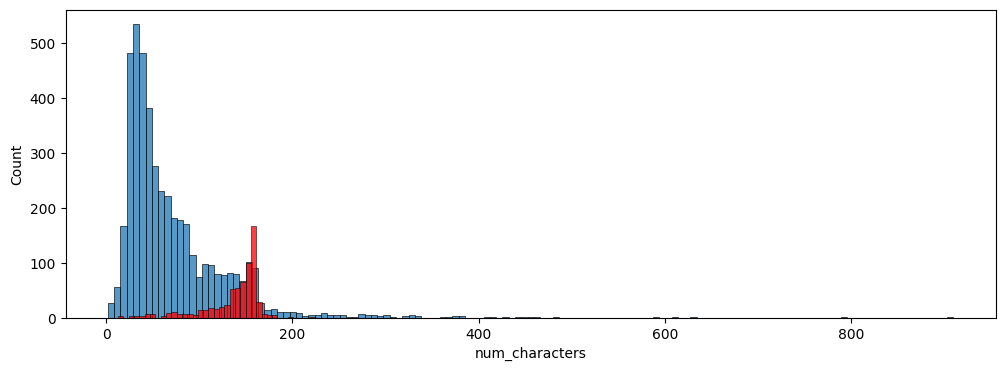

In [101]:
import seaborn as sns
plt.figure(figsize=(12,4))
sns.histplot(df[df["Target"]==0]["num_characters"])
sns.histplot(df[df["Target"]==1]["num_characters"],color='red')

Jaydatar ham message kam Character se bane hai &
Jaydatar spam message jyada Character se bane hai

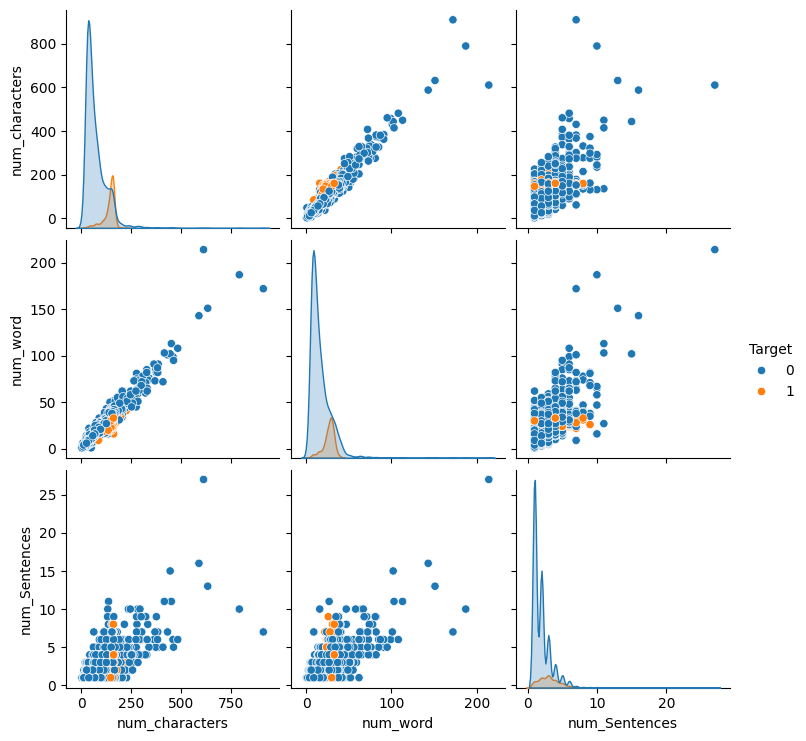

In [102]:
#Now We will see ki in column ka aapas me kaise relationship hai
sns.pairplot(df,hue="Target")

In [103]:
# sns.heatmap(df.corr(),annot=True)

***DATA PREPROCESSING***

1.   Lower case
2.   Tokenization

1.   Removing special Charcters
2.   Removing stop words and punctuations

1.   Stemming







In [104]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [105]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords', download_dir='/root/nltk_data/')
nltk.download('punkt', download_dir='/root/nltk_data/')

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = text.split()

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)



[nltk_data] Downloading package stopwords to /root/nltk_data/...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data/...
[nltk_data]   Package punkt is already up-to-date!


In [106]:
# Example usage
text = "Hello! This is an example sentence."
print(transform_text(text))

exampl


In [107]:
text="I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."
transform_text(text)

'gonna home soon want talk stuff anymor cri enough'

In [108]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [109]:
df.head()

,Target,Text,num_characters,num_word,num_Sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,3,go jurong avail bugi n great world la e cine g...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun say earli u c alreadi
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe live around though


NOW,we will use Word Clouding:-


* Important Message ko Bada karke dikhata hai








In [110]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [111]:
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep=" "))

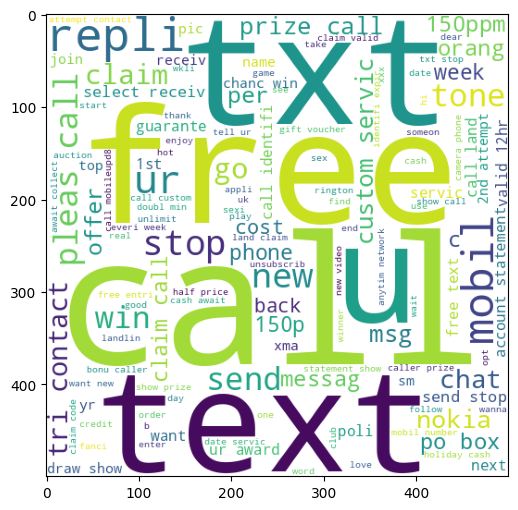

In [112]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

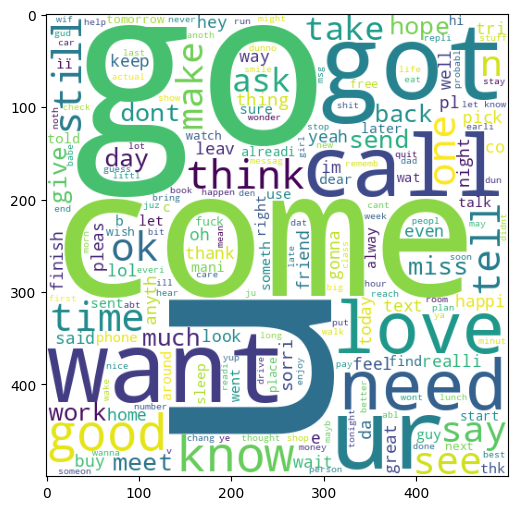

In [113]:
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

* Now,Yaha Spam Message me se Top 30 word ko extract kar rha hai


In [58]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [59]:
len(spam_corpus)

8176

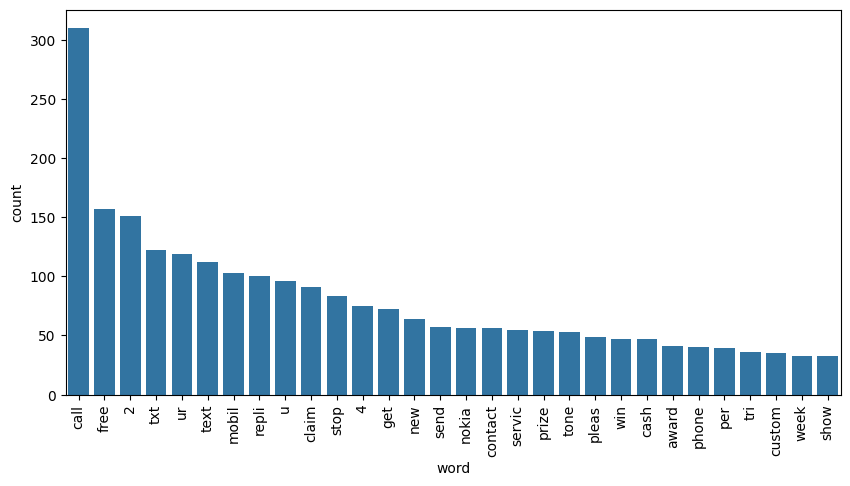

In [61]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from collections import Counter

# # Get the most common 30 words
# word_counts = Counter(spam_corpus).most_common(30)

# # Convert to DataFrame
# df = pd.DataFrame(word_counts, columns=['word', 'count'])

# # Plot
# plt.figure(figsize=(10,5))
# sns.barplot(x='word', y='count', data=df)  # Use named arguments
# plt.xticks(rotation='vertical')
# plt.show()


* Text Vectorization
*using Bag of Words

In [114]:
df.head()

,Target,Text,num_characters,num_word,num_Sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,3,go jurong avail bugi n great world la e cine g...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun say earli u c alreadi
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe live around though



**4. Model Building**

In [115]:
#Vectorized using tfidf
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [116]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [117]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [118]:
y = df['Target'].values

In [119]:
from sklearn.model_selection import train_test_split

In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

**Model-naive_bayes**

In [120]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

**naive_bayes Types**

In [121]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [124]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7911025145067698
[[700 196]
 [ 20 118]]
0.37579617834394907


In [125]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[888   8]
 [ 22 116]]
0.9354838709677419


In [126]:

bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9738878143133463
[[894   2]
 [ 25 113]]
0.9826086956521739


Apply Other ML Model

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [128]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [129]:

clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [130]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [131]:

train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9632495164410058, 0.8731343283582089)

In [132]:

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9632495164410058
Precision -  0.8731343283582089
For  KN
Accuracy -  0.9032882011605415
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  0.9354838709677419
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8148148148148148
For  LR
Accuracy -  0.9671179883945842
Precision -  0.940677966101695
For  RF
Accuracy -  0.971953578336557
Precision -  0.9823008849557522
For  AdaBoost
Accuracy -  0.925531914893617
Precision -  0.8505747126436781
For  BgC
Accuracy -  0.9555125725338491
Precision -  0.859375
For  ETC
Accuracy -  0.971953578336557
Precision -  0.9658119658119658
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.9285714285714286
For  xgb
Accuracy -  0.9642166344294004
Precision -  0.9391304347826087


In [133]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [134]:

performance_df

,Algorithm,Accuracy,Precision
1,KN,0.903288,1.000000
5,RF,0.971954,0.982301
8,ETC,0.971954,0.965812
4,LR,0.967118,0.940678
10,xgb,0.964217,0.939130
2,NB,0.970986,0.935484
9,GBDT,0.947776,0.928571
0,SVC,0.963250,0.873134
7,BgC,0.955513,0.859375
6,AdaBoost,0.925532,0.850575


In [135]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))